In [1]:
import sys
sys.path.insert(0, '../')
import matplotlib.pyplot as plt
import numpy as np
from dataio.transformation.imageTransformations import RandomFlipTransform

RuntimeError: Failed to register operator torchvision::_new_empty_tensor_op.                            The symbolic name must match the format Domain::Name,                            and sould start with a letter and contain only                            alphanumerical characters

In [8]:
dataset_path = '/Users/julian/stroke_research/data/all2016_subset_prepro/data_set.npz'
channel = 0
subj = 1
raw_images = np.load(dataset_path, allow_pickle=True)['ct_inputs'][subj][..., channel].astype(np.int16)
# raw_labels = np.load(dataset_path, allow_pickle=True)['ct_lesion_GT'][subj].astype(np.uint8)
raw_labels = np.load(dataset_path, allow_pickle=True)['lesion_GT'][subj].astype(np.uint8)
raw_images.shape

(79, 95, 79)

In [6]:
def show_slices(slices, cmap):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap=cmap, origin="lower")

def display(img_data, block=True, title=None, cmap='gray'):
    if len(img_data.shape) > 3 : img_data = np.squeeze(img_data)
    n_i, n_j, n_k = img_data.shape
    center_i = (n_i - 1) // 2
    center_j = (n_j - 1) // 2
    center_k = (n_k - 1) // 2
    print('Image center: ', center_i, center_j, center_k)
    center_vox_value = img_data[center_i, center_j, center_k]
    print('Image center value: ', center_vox_value)

    slice_0 = img_data[center_i, :, :]
    slice_1 = img_data[:, center_j, :]
    slice_2 = img_data[:, :, center_k]

    show_slices([slice_0, slice_1, slice_2], cmap=cmap)

    plt.suptitle("Center slices for image")
    if title:
        plt.suptitle(title)
    plt.show(block = block)
    return plt

Image center:  39 47 39
Image center value:  10
Image center:  39 47 39
Image center value:  0


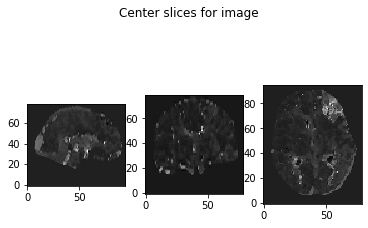

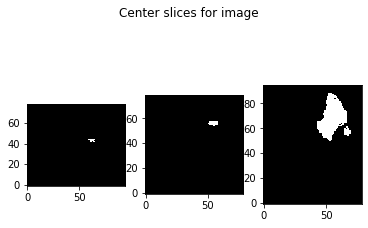

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

In [9]:
display(raw_images)
display(raw_labels)

In [10]:
flip_axis = (0)
random_flip_prob = 1
seed = 42
max_output_channels = 2

In [13]:
transform = RandomFlipTransform(axes=flip_axis, p=random_flip_prob, seed=seed, max_output_channels=max_output_channels),
transformed_input, transformed_label = transform(raw_images, raw_labels)

NameError: name 'RandomFlipTransform' is not defined

In [ ]:
display(transformed_input)
display(transformed_label)

